# Imports Libraries

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.dates

from datetime import date, datetime

import sys
sys.path.append("../src/")
from feature_engineering import produce_data_features, get_season

%matplotlib inline

# Load data

In [ ]:
#df = pd.read_csv("/Users/ismail.lachheb/Projects/dsin2/la-haute-borne-data-2017-2020.csv", sep=";")
df = pd.read_csv("/Users/lea.naccache/CODE/cercle_formation/la-haute-borne-data-2017-2020.csv", sep=";")

In [ ]:
df.describe()

In [ ]:
df.shape

# Analysis 

In [ ]:
df.keys()

In [ ]:
df.Wind_turbine_name.value_counts()

In [ ]:
plt.plot(df.Ba_avg)
plt.ylim((80, 120))   # set the xlim to left, right

# Feature Engineering

### Select target

In [8]:
target = "Ba_avg"

In [9]:
df = df.dropna(subset=[target], axis=0)

### Create feature with time

In [10]:
df = produce_data_features(df)

### remove columns with missing values 

In [11]:
df

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,...,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std,date,year,month,season
0,R80721,2017-02-08T08:00:00+01:00,44.990002,44.990002,44.990002,0.00,14.00,14.00,14.0,0.00,...,NaN,NaN,358.04999,NaN,NaN,NaN,2017-02-08 07:00:00+00:00,2017,2,1
1,R80721,2017-01-26T02:40:00+01:00,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-26 01:40:00+00:00,2017,1,1
2,R80721,2017-01-26T13:50:00+01:00,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-26 12:50:00+00:00,2017,1,1
3,R80721,2017-01-26T15:00:00+01:00,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-26 14:00:00+00:00,2017,1,1
4,R80721,2017-02-18T01:10:00+01:00,44.990002,44.990002,44.990002,0.00,17.00,17.00,17.0,0.00,...,NaN,NaN,7.99000,NaN,NaN,NaN,2017-02-18 00:10:00+00:00,2017,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217583,R80721,2017-12-13T23:10:00+01:00,1.690000,-1.020000,13.300000,3.62,15.11,15.00,16.0,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-13 22:10:00+00:00,2017,12,1
217584,R80721,2017-12-14T03:30:00+01:00,6.350000,-1.010000,18.230000,5.51,16.15,16.00,17.0,0.33,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-14 02:30:00+00:00,2017,12,1
217585,R80721,2017-12-14T04:20:00+01:00,-0.570000,-1.030000,4.320000,0.88,17.00,17.00,17.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-14 03:20:00+00:00,2017,12,1
217586,R80721,2017-12-14T05:10:00+01:00,-0.830000,-1.020000,3.890000,0.45,17.00,16.76,17.0,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-14 04:10:00+00:00,2017,12,1


In [12]:
df.isnull().sum()[df.isnull().sum() > 100000].count()

16

In [13]:
X = df.drop(columns=["Wind_turbine_name", target, "Ba_min", "Ba_max", "Ba_std", "Date_time", "date"])
y = df[target]

In [14]:
X.isnull().sum()[X.isnull().sum() > 0].count()

60

In [15]:
X.isnull().sum()[X.isnull().sum() > 0]

Q_avg         3330
Q_min         3330
Q_max         3330
Q_std         3330
S_avg            3
S_min            3
S_max            3
S_std            3
Ds_avg        1271
Ds_min        1271
Ds_max        1271
Ds_std        1271
Ws1_avg        988
Ws1_min        988
Ws1_max        988
Ws1_std        988
Ws2_avg        952
Ws2_min        952
Ws2_max        952
Ws2_std        952
Va1_avg      77132
Va1_min      77132
Va1_max      77132
Va1_std      77132
Va2_avg      77132
Va2_min      77132
Va2_max      77132
Va2_std      77132
Va_avg      138504
Va_min      138504
Va_max      138504
Va_std      138504
Nf_avg           3
Nf_min           3
Nf_max           3
Nf_std           3
Nu_avg           3
Nu_min           3
Nu_max           3
Nu_std           3
Rs_avg        2832
Rs_min        2832
Rs_max        2832
Rs_std        2832
Rm_avg        3551
Rm_min        3551
Rm_max        3551
Rm_std        3551
Pas_avg     215636
Pas_min     215636
Pas_max     215636
Pas_std     215636
Wa_c_avg    

we need to replace value for 15 distribution

In [16]:
X[X[['Q_avg','Q_min','Q_max', 'Q_std']].isna().any(axis=1)][['Q_avg', 'Q_min', 'Q_max', 'Q_std']]

,Q_avg,Q_min,Q_max,Q_std
866,NaN,NaN,NaN,NaN
1125,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN
1305,NaN,NaN,NaN,NaN
1314,NaN,NaN,NaN,NaN
...,...,...,...,...
217408,NaN,NaN,NaN,NaN
217410,NaN,NaN,NaN,NaN
217412,NaN,NaN,NaN,NaN
217414,NaN,NaN,NaN,NaN


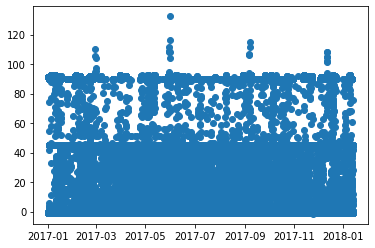

In [17]:
dates = matplotlib.dates.date2num(df.date)
matplotlib.pyplot.plot_date(dates, y)

## 1. Replace by the value of the day before

In [18]:
 df.sort_values(by='date')

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,...,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std,date,year,month,season
125374,R80790,2017-01-01T00:00:00+01:00,-1.000000,-1.000000,-0.860000,0.01,13.00,13.0,13.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:00:00+00:00,2016,12,1
164341,R80721,2017-01-01T00:00:00+01:00,91.529999,91.529999,91.529999,0.00,12.21,12.0,13.0,0.38,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:00:00+00:00,2016,12,1
60539,R80711,2017-01-01T00:00:00+01:00,-0.990000,-0.990000,-0.900000,0.00,12.00,12.0,12.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:00:00+00:00,2016,12,1
115585,R80736,2017-01-01T00:00:00+01:00,0.000000,0.000000,0.000000,0.00,11.00,11.0,11.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:00:00+00:00,2016,12,1
17563,R80711,2017-01-01T00:10:00+01:00,-0.990000,-0.990000,-0.990000,0.00,12.00,12.0,12.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:10:00+00:00,2016,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74443,R80736,2018-01-12T23:50:00+01:00,45.000000,45.000000,45.000000,0.00,13.79,13.0,14.0,0.37,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 22:50:00+00:00,2018,1,1
79411,R80721,2018-01-13T00:00:00+01:00,44.990000,44.990000,44.990000,0.00,14.94,14.0,15.0,0.21,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 23:00:00+00:00,2018,1,1
175989,R80711,2018-01-13T00:00:00+01:00,-0.060000,-0.490000,0.500000,0.36,13.41,13.0,14.0,0.37,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 23:00:00+00:00,2018,1,1
208260,R80790,2018-01-13T00:00:00+01:00,44.990000,44.990000,44.990000,0.00,14.00,13.5,14.0,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 23:00:00+00:00,2018,1,1


In [19]:
features = ['Q_avg','Q_min','Q_max','Q_std']
def fillna_with_previous_values(features, df):
    for feature in features:
        df[feature] = df[feature].fillna(method='ffill')

In [20]:
fillna_with_previous_values(features, df)

## 2. Replace by the average value 

In [21]:
features = ['Va1_avg','Va1_min','Va1_max','Va1_std']
def fillna_with_mean(features, df):
    for feature in features:
        df[feature] = df[feature].fillna(df[feature].mean())

In [22]:
df['Va1_avg'].mean()

0.6367180731242419

In [23]:
fillna_with_mean(features, df)

In [24]:
df[['Va1_avg','Va1_min','Va1_max','Va1_std']].isnull().sum()

Va1_avg    0
Va1_min    0
Va1_max    0
Va1_std    0
dtype: int64

## 3. Replace by the median value 

In [28]:
features = ['Va2_avg','Va2_min','Va2_max','Va2_std']
def fillna_with_median(features):
    for feature in features:
        df[feature] = df[feature].fillna(df[feature].median())

In [29]:
df['Va1_avg'].median()

0.6367180731242419

In [31]:
fillna_with_median(features)

In [32]:
df[['Va2_avg','Va2_min','Va2_max','Va2_std']].isnull().sum()

Va2_avg    0
Va2_min    0
Va2_max    0
Va2_std    0
dtype: int64

In [ ]:
X = X.fillna(0)

In [ ]:
y = df[target]

### Split Dataset into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Random forest model

## Training 

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=6)

In [ ]:
model.fit(X_train, y_train)

## Prediction 

In [ ]:
y_pred_test = model.predict(X_test)
((y_pred_test - y_test) > 0.2).value_counts() / len(y_test)

In [ ]:
y_pred_train = model.predict(X_train)
((y_pred_train - y_train) > 0.2).value_counts() / len(y_train)